In [16]:
%run ../../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# Logistic Regression

## What is

Logistic Regression [[1]](#cox) is, despite the name, a classifier. Its procedure fits (hence the reference to regression) the *logistic function*, or *sigmoid*,

$$
y = \frac{1}{1 + e^{-x}} \ ,
$$

in the figure here.

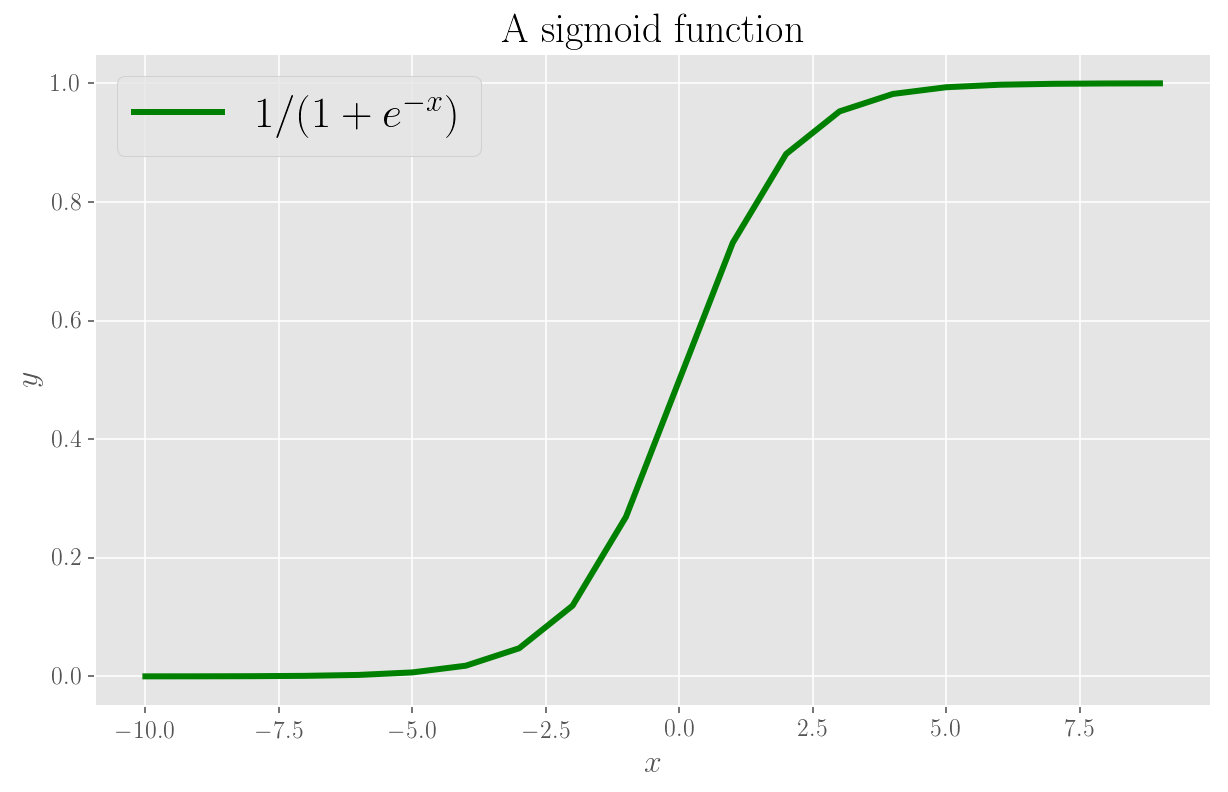

In [15]:
x = np.arange(-10, 10, 1)
y = 1. / (1 + np.exp(-x))

plt.plot(x, y, color='g', label='$1/(1 + e^{-x})$')
plt.title('A sigmoid function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show();

## How does it work

This exposition is inspired and re-worked from [[2]](#ng).

The idea is: given a categorical variable $y \in {0, 1}$ and some independent variable $x$ which we want to use in order to classify $y$, we could think of running a [linear regression](../regression/linear-regression.ipynb) $y = mx + b$ followed by a classification (say if $mx \geq 0.5$ we classify $y$ as 1 and if $mx < 0.5$ we classify it as 0).

<img src="../../imgs/logregre.png" width="500" align="right" style="margin:0px 50px"/>

This would work fine if we were in the case displayed in the left side of the pictures here. But if, as in the right side, the training set is such that a point is far away from the rest, this point would be, with this procedure, classified as a 0!

The logistic regression uses a sigmoid function model:

$$
h_{\theta}(x) = \frac{1}{1 + e^{- \theta x}}
$$

where $0 \leq h \leq 1$ can be interpreted as the probability that $y=1$ given $x$ as the input and $\theta$ the parameters:

$$
h_\theta(x) = P(y=1 \ | \ x; \theta)
$$

A logistic regression is a linear classifier: it predicts $y=1$ when $h \geq 0.5$ and $y=0$ otherwise, so the decision boundary is $\theta x = 0$.

### An example

<img src="../../imgs/logregre-ex.jpg" width="300" align="left" style="margin:0px 50px"/>

Suppose we find parameters (we are in multiple dimensions)

$$
\bar{\theta} = 
	\begin{bmatrix}
	-3 \\
	1 \\
	1
	\end{bmatrix} \ ,
$$

we would predict $y=1$ if $-3+x_1+x_2 \geq 0$, that is, if $x_1 + x_2 \geq 3$, and $y=0$ otherwise. See figure for a visual display of this.

Note though, that ff the boundary, from training data is not linear, we should use a logistic regression with higher order polynomials, as in $h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2)$, with $g$ being the logistic function (the sigmoid). As in a [polynomial regression](../regression/polynomial-regression.ipynb), higher order features can be treated as first order ones with a substitution. 

### Finding the parameters

Now, how do we find the coefficients $\bar{\theta}$? We use a cost function as in the regular linear regression.

Given a training set with $m$ samples, in a multi-dimensional space, ${(\bar{x}^1, y^1), \cdots, ((\bar{x}^m, y^m)}$, where we have $n$ features for each sample, so $\bar{x}$ is a vector in $\mathbb{R}^n$ and $y \in {0, 1}$, the model is

$$
h_\theta(\bar{x}) = \frac{1}{1 + e^{- \bar{\theta}^t \bar{x}}} \ .
$$

<img src="../../imgs/logregre-cost.jpg" width="300" align="right" style="margin:0px 50px"/>

The cost function minimised in the case of linear regression would be a non-convex function with many local minima in the case of the logistic model so a gradient descent would not find the global minimum. Instead, the cost function we use is (illustrated in figure):

$$
cost(h_\theta(\bar{x}), y) = 
\begin{cases} 
	- \log{h_\theta(\bar{x})} \ \ \text{if} \ \ y =1 \\ 
	- \log{1 - h_\theta(\bar{x})} \ \ \text{if} \ \  y =0
\end{cases}
$$

This cost function captures the intuition that if $h= 0 = P(y=1 | x; \theta)$, so the algorithm will be penalised with a large cost. All this can be written in a comprehensive form:

$$
cost(h_\theta(\bar{x}), y) = 
	\frac{1}{m} \sum_{i=1}^{m} [y^i \log{h_\theta(\bar{x})} + (1 - y^i) \log{1 - h_\theta(\bar{x})}] \ ,
$$

At this point a [gradient descent](../../algorithms/gradient-descent.ipynb) is used to compute the minimum over parameters $\bar{\theta}$ of the cost function. 

Logistic Regression is a case of a *Generalised Linear Model*: the predictor function is indeed linear in the input variable:

$$
h = \frac{1}{1 + e^{- \theta x}} \Leftrightarrow 1 + e^{- \theta x} = \frac{1}{h}
\Leftrightarrow \theta x = \log{\frac{h}{1-h}}
$$

with $h$ being interpreted as a probability as explained above.

## References 

1. <a name="cox"></a> D R Cox, [The regression analysis of binary sequences](https://www.nuffield.ox.ac.uk/users/cox/cox48.pdf), *Journal of the Royal Statistical Society B*, 20:2, 1958
2. <a name="ng"></a> [Notes on linear and logistic regression from the Stanford ML course by A Ng](http://cs229.stanford.edu/notes/cs229-notes1.pdf)